In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.fillna({'Age': df['Age'].median()}, inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df = df.drop_duplicates()


In [11]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [12]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [13]:
df = df.drop(['Name', 'Ticket'], axis=1)


In [14]:
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,Unknown,False,True
1,2,1,1,1,38.0,1,0,71.2833,C85,False,False
2,3,1,3,1,26.0,0,0,7.9250,Unknown,False,True
3,4,1,1,1,35.0,1,0,53.1000,C123,False,True
4,5,0,3,0,35.0,0,0,8.0500,Unknown,False,True


In [15]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [ ]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891,891,891
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,False,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,687,814,646
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    object 
 9   Embarked_Q   891 non-null    bool   
 10  Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(1)
memory usage: 64.5+ KB


In [19]:
print(df.select_dtypes(exclude=[np.number]).columns)


Index(['Cabin', 'Embarked_Q', 'Embarked_S'], dtype='object')


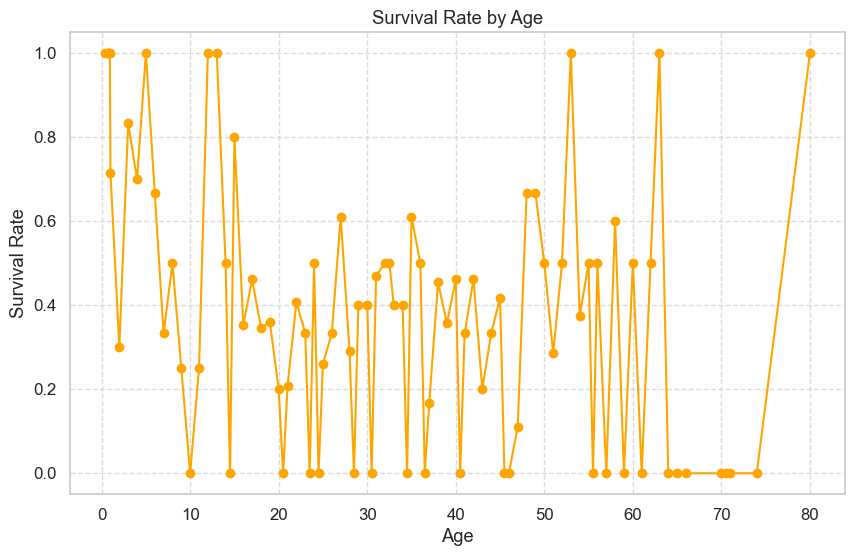

In [20]:
age_survival = df.groupby('Age')['Survived'].mean()

plt.figure(figsize=(10,6))
plt.plot(age_survival.index, age_survival.values, color='orange', marker='o')
plt.title("Survival Rate by Age")
plt.xlabel("Age")
plt.ylabel("Survival Rate")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


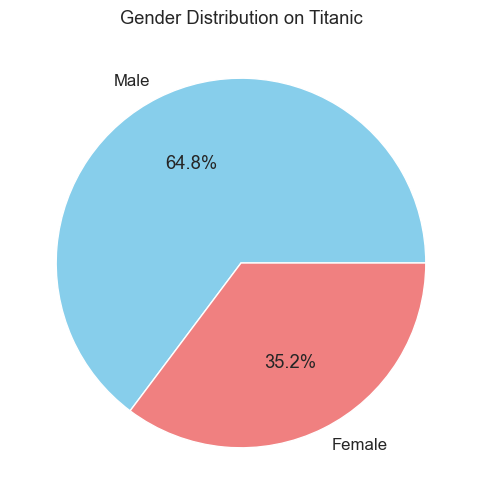

In [22]:
gender_counts = df['Sex'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Gender Distribution on Titanic")
plt.show()


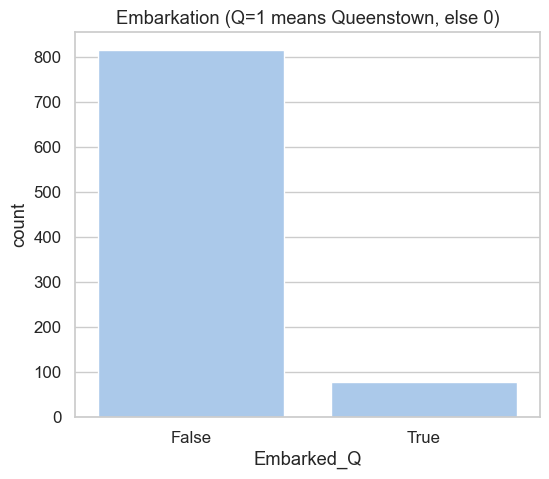

In [23]:
plt.figure(figsize=(6,5))
sns.countplot(x='Embarked_Q', data=df)
plt.title("Embarkation (Q=1 means Queenstown, else 0)")
plt.show()


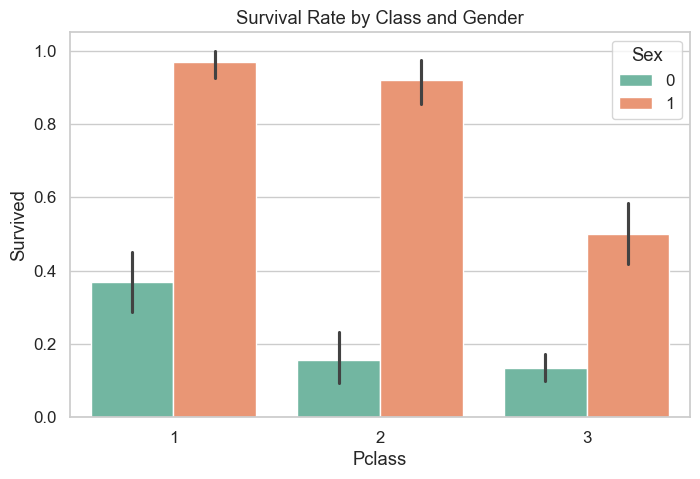

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, palette='Set2')
plt.title("Survival Rate by Class and Gender")
plt.show()


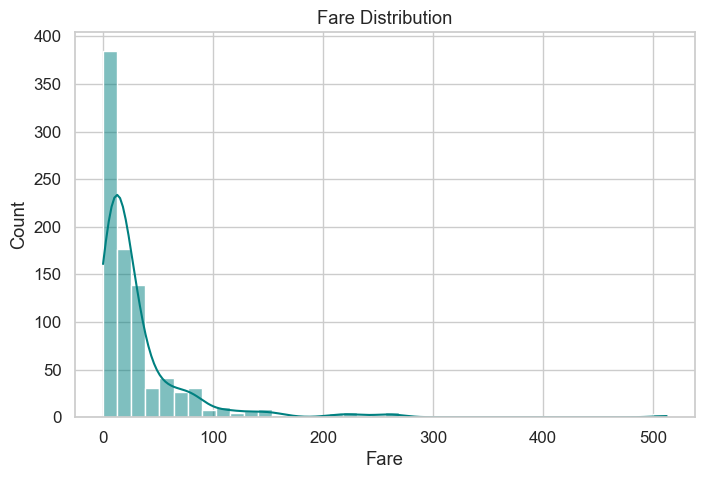

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], bins=40, kde=True, color='teal')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


C:\Users\DHARM SHAH\AppData\Local\Temp\ipykernel_6256\490969269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='coolwarm')


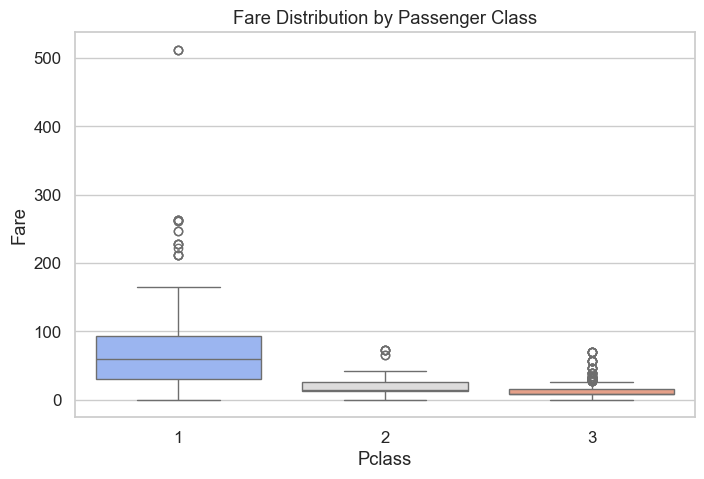

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='coolwarm')
plt.title("Fare Distribution by Passenger Class")
plt.show()


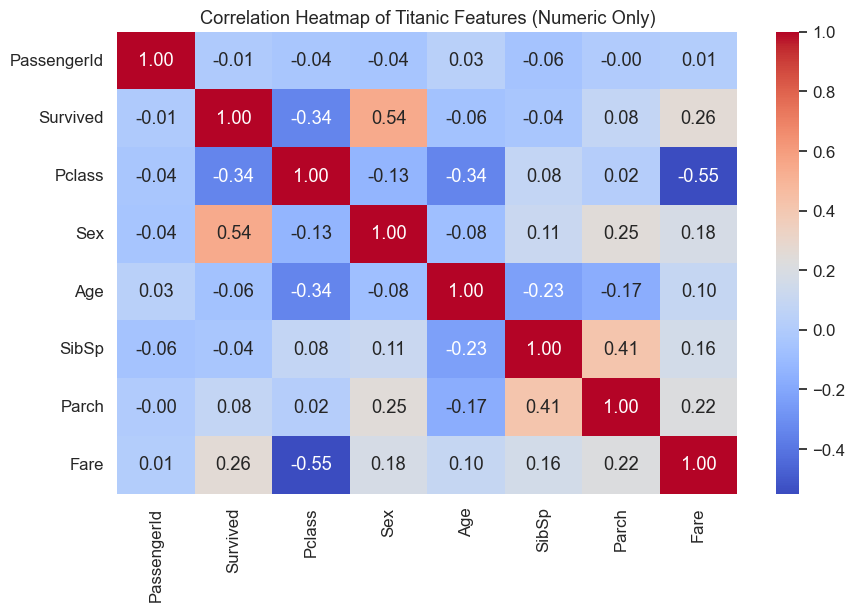

In [27]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Titanic Features (Numeric Only)")
plt.show()